In [112]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, MaxPooling2D, Conv2D, BatchNormalization, Flatten
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [113]:
batch_size = 32
image_size = 128
class_names = ['Crazing', 'Inclusion', 'Patches', 'Pitted Surface', 'Rolled-in-scale', 'Scratches']

In [114]:
def rescale(image, label):
    return image / 255., label

def load_data(path, batch_size=32, image_size=128):
    data = image_dataset_from_directory(
        path,
        labels='inferred',
        label_mode='categorical',
        batch_size=batch_size,
        image_size=(image_size,image_size)
    ).map(rescale)
    return data

In [115]:
train = load_data('train')
test = load_data('test')
valid = load_data('valid')

Found 1656 files belonging to 6 classes.
Found 72 files belonging to 6 classes.
Found 72 files belonging to 6 classes.


In [116]:
train.element_spec


(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 6), dtype=tf.float32, name=None))

In [117]:
for images, labels in train.take(1):
    print(images.shape)
    print(labels.shape)
    break

(32, 128, 128, 3)
(32, 6)


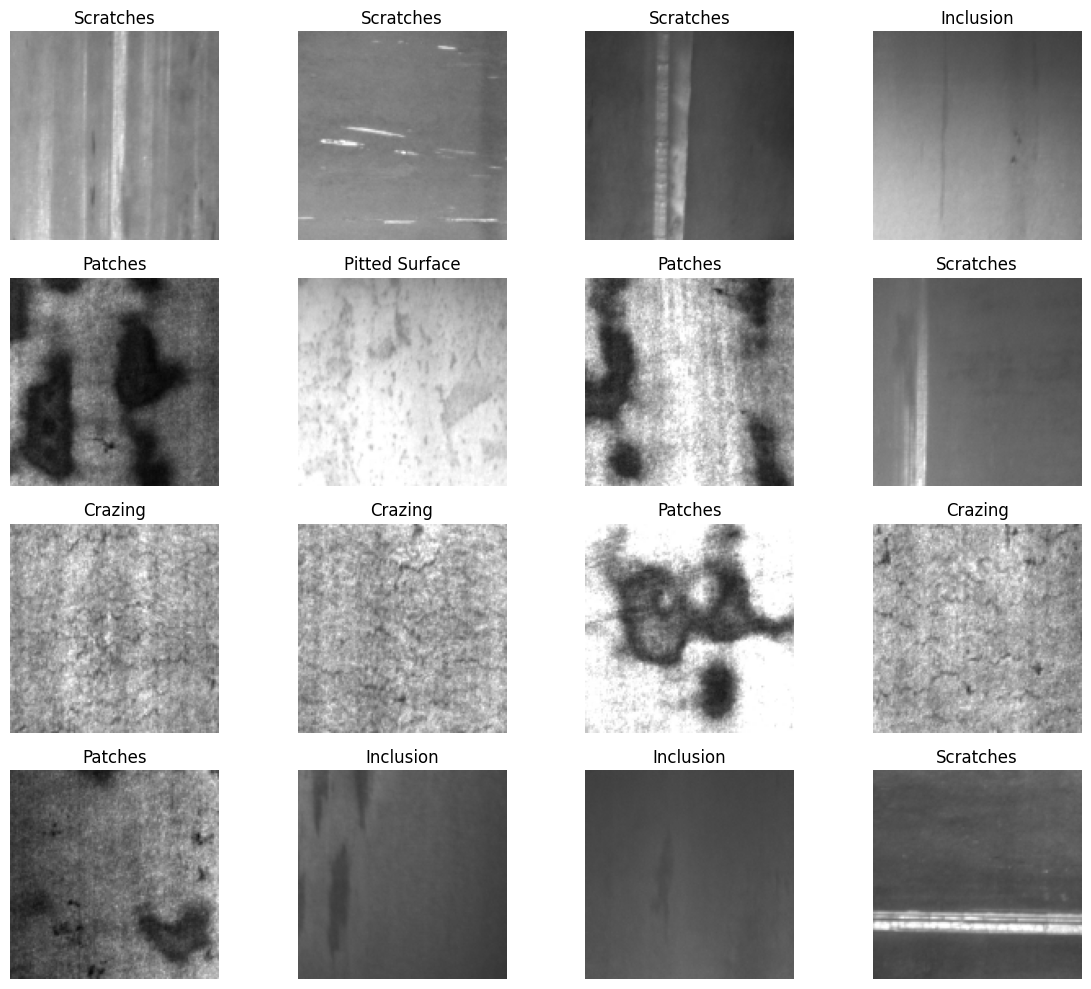

In [146]:
for image, label in train:
    plt.figure(figsize=(12,10))
    for i in range(16):
        ax = plt.subplot(4,4,i+1)
        plt.imshow(image[i].numpy())
        plt.title(class_names[np.argmax(label[i])])
        plt.axis('off')
    plt.tight_layout()
    break

In [119]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(image_size,image_size,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(class_names), activation='softmax')])

model.summary()

c:\Users\Swastik\miniconda3\envs\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,393,094 (28.20 MB)

 Trainable params: 7,393,094 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [120]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [121]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [122]:
history = model.fit(train, 
                    validation_data=valid, 
                    epochs=100,
                    callbacks=[early_stopping])

Epoch 1/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 118ms/step - accuracy: 0.2743 - loss: 1.9378 - val_accuracy: 0.7361 - val_loss: 0.8202
Epoch 2/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - accuracy: 0.7475 - loss: 0.7176 - val_accuracy: 0.8889 - val_loss: 0.4163
Epoch 3/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 111ms/step - accuracy: 0.8421 - loss: 0.4397 - val_accuracy: 0.9306 - val_loss: 0.2962
Epoch 4/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - accuracy: 0.8696 - loss: 0.3855 - val_accuracy: 0.9306 - val_loss: 0.2511
Epoch 5/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 111ms/step - accuracy: 0.9100 - loss: 0.2814 - val_accuracy: 0.8889 - val_loss: 0.2892
Epoch 6/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - accuracy: 0.9356 - loss: 0.2106 - val_accuracy: 0.6944 - val_loss: 0.8633
Epoch 7/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - accuracy: 0.9064 - loss: 0.2749 - val_accuracy: 0.9306 - val_loss: 0.1955
Epoch 8/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - accuracy: 0.9043 - loss: 0.2386 - val_accu

In [123]:
model.save('cnn_model.h5')

In [142]:
model = load_model('cnn_model.h5')

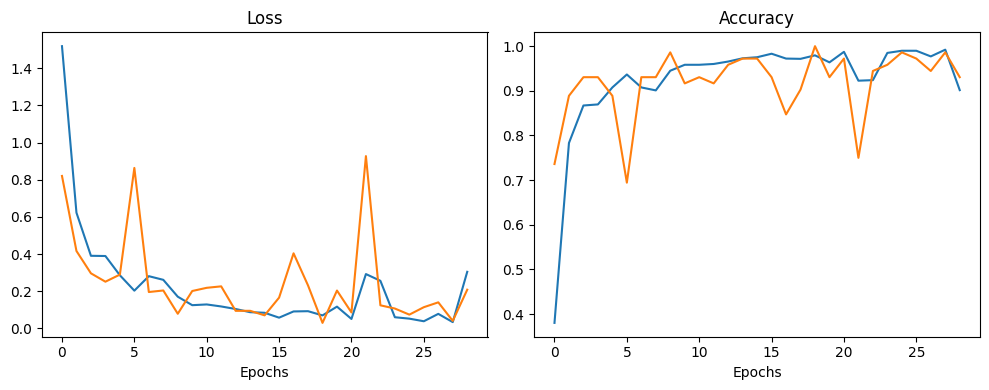

In [125]:
loss = history.history['loss']
accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(loss)
plt.plot(val_loss)
plt.title('Loss')
plt.xlabel('Epochs')

plt.subplot(1, 2, 2)
plt.plot(accuracy)
plt.plot(val_accuracy)
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.tight_layout()

In [126]:
test_loss, test_accuracy = model.evaluate(test)
print(f"Test accuracy for CNN model is {test_accuracy*100:.2f}%")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8859 - loss: 0.2240
Test accuracy for CNN model is 88.89%


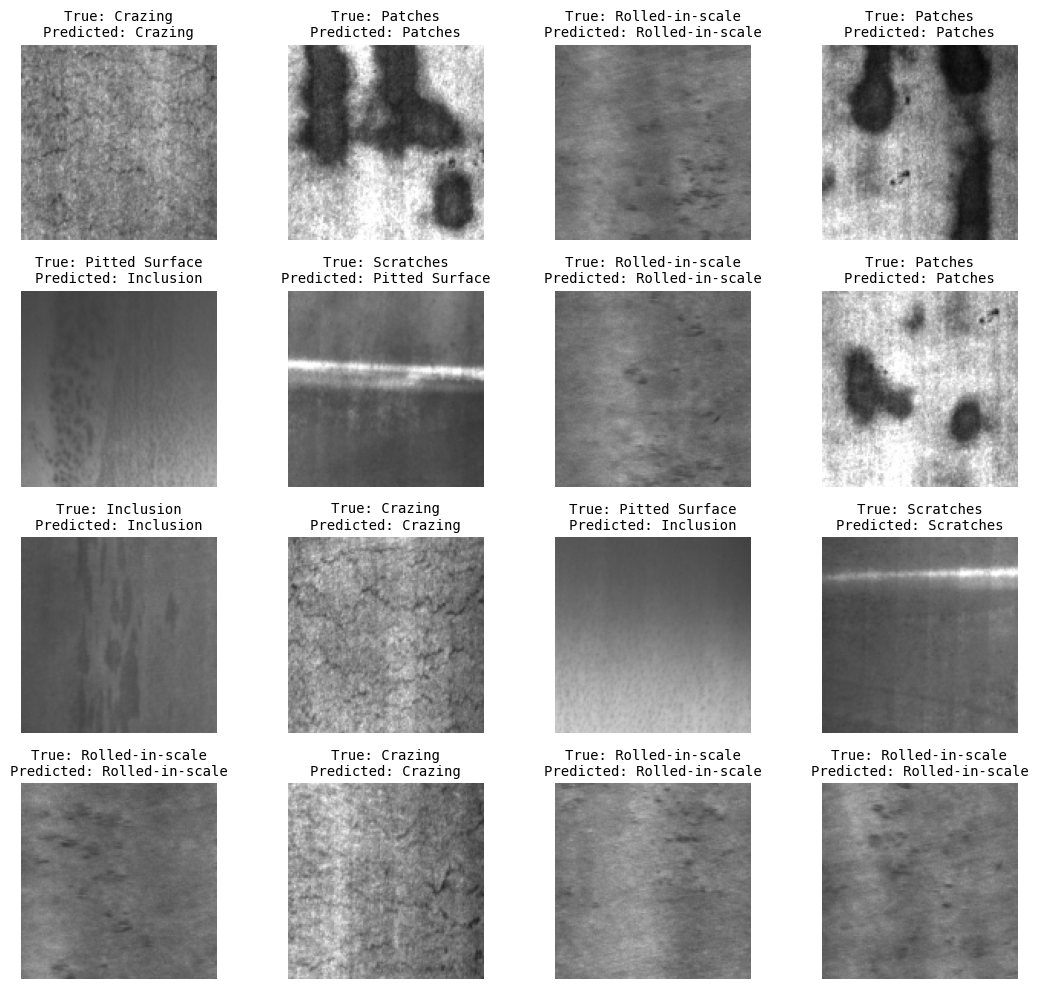

In [143]:
plt.figure(figsize = (12,10))

for images, labels in test.take(1):
  for i in range(16):
    ax = plt.subplot(4,4, i+1)
    plt.imshow(images[i])

    plt.title("True: " + class_names[tf.argmax(labels[i], axis = -1).numpy()] + "\n" 
              + "Predicted: " + class_names[int(tf.argmax(model(tf.expand_dims(images[i], axis = 0)), axis =-1).numpy()[0])],
             fontsize=10, fontfamily='monospace')
    plt.axis("off")
    plt.tight_layout()

### Transfer Learning Model

In [127]:
from tensorflow.keras.applications import VGG19

base_model = VGG19(weights='imagenet',
                   include_top=False,
                   input_shape=(image_size,image_size,3))
base_model.trainable = False

In [128]:
model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(class_names), activation='softmax')])

model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ (None, 4, 4, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,073,862 (80.39 MB)

 Trainable params: 1,049,478 (4.00 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [129]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [130]:
history = model.fit(train,
                    validation_data=valid,
                    callbacks=[early_stopping],
                    epochs=100)

Epoch 1/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 0.5964 - loss: 1.1506 - val_accuracy: 0.9583 - val_loss: 0.1992
Epoch 2/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step - accuracy: 0.9198 - loss: 0.2713 - val_accuracy: 0.9861 - val_loss: 0.1018
Epoch 3/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 146s 2s/step - accuracy: 0.9628 - loss: 0.1577 - val_accuracy: 0.9861 - val_loss: 0.0786
Epoch 4/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step - accuracy: 0.9705 - loss: 0.1131 - val_accuracy: 0.9861 - val_loss: 0.0783
Epoch 5/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - accuracy: 0.9736 - loss: 0.0951 - val_accuracy: 1.0000 - val_loss: 0.0497
Epoch 6/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 197s 4s/step - accuracy: 0.9740 - loss: 0.0767 - val_accuracy: 0.9861 - val_loss: 0.0427
Epoch 7/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 221s 4s/step - accuracy: 0.9813 - loss: 0.0677 - val_accuracy: 0.9583 - val_loss: 0.0608
Epoch 8/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.9849 - loss: 0.0584 - val_accuracy: 1.000

In [131]:
model.save('vgg19_model.h5')

In [144]:
model = load_model('vgg19_model.h5')

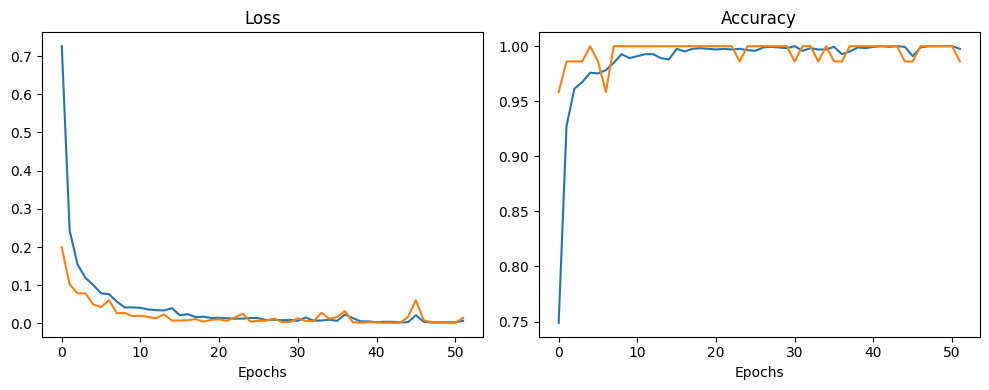

In [133]:
loss = history.history['loss']
accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(loss)
plt.plot(val_loss)
plt.title('Loss')
plt.xlabel('Epochs')

plt.subplot(1, 2, 2)
plt.plot(accuracy)
plt.plot(val_accuracy)
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.tight_layout()

In [134]:
test_loss, test_accuracy = model.evaluate(test)
print(f"Test accuracy for CNN model is {test_accuracy*100:.2f}%")

3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 1.0000 - loss: 0.0085
Test accuracy for CNN model is 100.00%


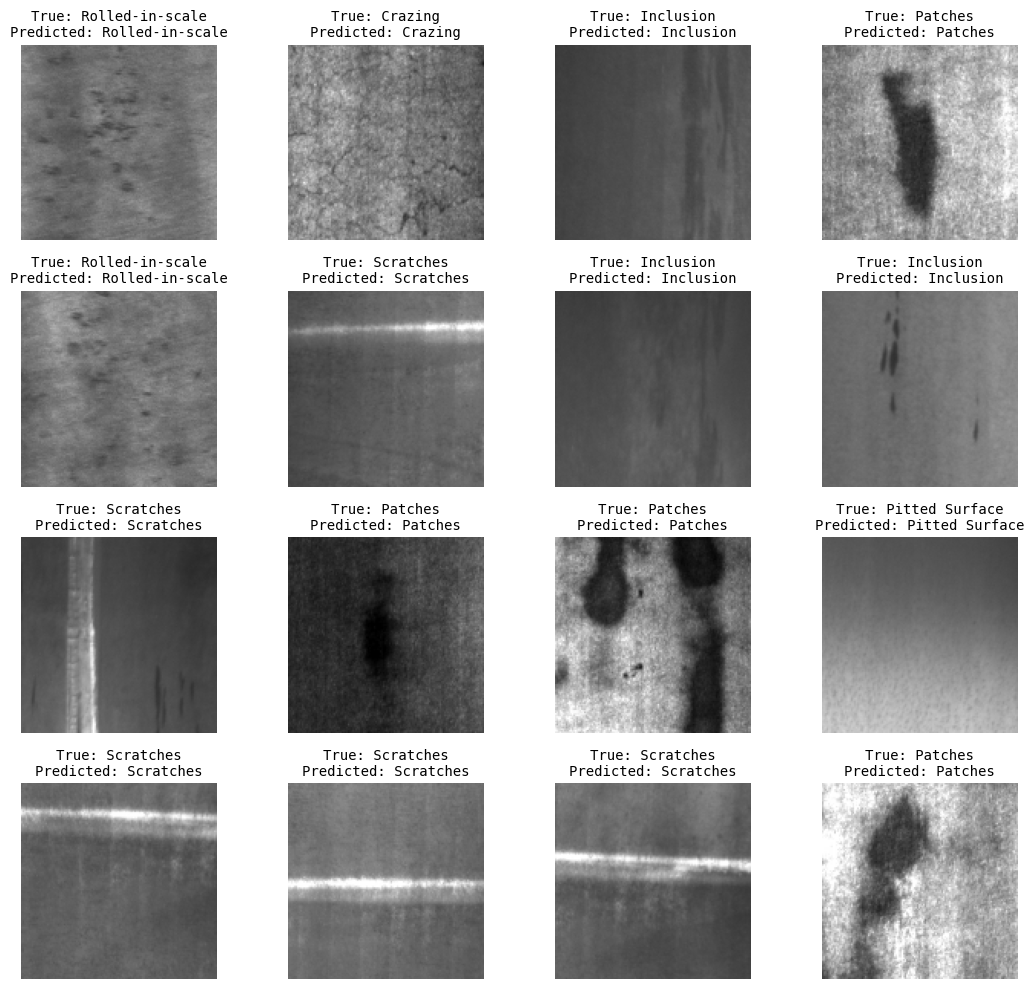

In [141]:
plt.figure(figsize = (12,10))

for images, labels in test.take(1):
  for i in range(16):
    ax = plt.subplot(4,4, i+1)
    plt.imshow(images[i])

    plt.title("True: " + class_names[tf.argmax(labels[i], axis = -1).numpy()] + "\n" 
              + "Predicted: " + class_names[int(tf.argmax(model(tf.expand_dims(images[i], axis = 0)), axis =-1).numpy()[0])],
             fontsize=10, fontfamily='monospace')
    plt.axis("off")
    plt.tight_layout()

### Training on GPU

In [136]:
# Check if GPU is available
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))
print("Using GPU:", tf.test.is_gpu_available())

Num GPUs Available: 0
Using GPU: False


In [148]:
tf.__version__

'2.19.0'